In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in dataframe
moviedf= pd.read_csv("../rotten_tomatoes_movies.csv")
moviedf.tail(50)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
17662,m/youth_in_revolt,Youth in Revolt,"As a fan of Albert Camus and Jean-Luc Godard, ...",It may not entirely do its source material jus...,R,"Comedy, Drama, Romance",Miguel Arteta,Gustin Nash,"Michael Cera, Portia Doubleday, Adhir Kalyan, ...",2010-01-08,...,The Weinstein Company,Fresh,66.0,171.0,Spilled,52.0,114594.0,44,113,58
17663,m/youth_without_youth,Youth Without Youth,"In Romania in the late 1930s, Dominic (Tim Rot...","Although visually appealing, Coppola's latest ...",R,"Drama, Mystery & Suspense, Romance",Francis Ford Coppola,Francis Ford Coppola,"Tim Roth, Alexandra Maria Lara, Bruno Ganz, An...",2007-12-14,...,Sony Pictures Classics,Rotten,32.0,105.0,Spilled,44.0,16878.0,40,34,71
17664,m/youve_been_trumped_2011,You've Been Trumped,Scottish landowners go head-to-head with billi...,NaN,NR,"Documentary, Special Interest",Anthony Baxter,"Anthony Baxter, Richard Phinney","Donald Trump, Michael Forbes, Molly Forbes, Su...",2012-08-03,...,International Film Circuit,Fresh,85.0,34.0,Upright,72.0,1620.0,19,29,5
17665,m/youve_got_mail,You've Got Mail,Struggling boutique bookseller Kathleen Kelly ...,Great chemistry between the leads made this a ...,PG,"Comedy, Drama, Romance",Nora Ephron,"Nora Ephron, Delia Ephron, Miklós László","Tom Hanks, Meg Ryan, Parker Posey, Greg Kinnea...",1998-12-18,...,Warner Bros. Pictures,Fresh,70.0,89.0,Upright,73.0,462450.0,22,62,27
17666,m/yu_gi_oh_the_movie,Yu-Gi-Oh!: The Movie,Young Yugi (Dan Green) must use his game skill...,Don't watch the TV show or play the card game?...,PG,"Action & Adventure, Animation, Kids & Family, ...",Hatsuki Tsuji,"Junki Takegami, Masahiro Hikokubo, Matthew Drd...","Dan Green, Eric Stuart, Wayne Grayson, Darren ...",2004-08-07,...,Warner Bros. Pictures,Rotten,5.0,66.0,Spilled,49.0,10998.0,22,3,63
17667,m/yukinojo_henge_1971,Yukinojo Henge (An Actor's Revenge),A Kabuki actor exacts a bloody revenge after h...,NaN,NR,"Art House & International, Drama",Kon Ichikawa,"Daisuke Itô, Teinosuke Kinugasa, Natto Wada","Kazuo Hasegawa, Fujiko Yamamoto, Ayako Wakao, ...",1971-06-16,...,Daiei Studios,Fresh,95.0,20.0,Upright,82.0,464.0,6,19,1
17668,m/yume-ju-ya-ten-nights-of-dreams,Ten Nights of Dreams (Yume jû-ya),Ten dream sequences range from wacky visions t...,NaN,NR,"Art House & International, Science Fiction & F...","Yoshitaka Amano, Kon Ichikawa, Akio Jissoji, M...",NaN,"Kyôko Koizumi, Tsuyoshi Ujiki, Keisuke Horibe,...",2006-10-22,...,Cinema Epoch,Fresh,80.0,5.0,Spilled,47.0,381.0,2,4,1
17669,m/yves_saint_laurent_lamour_fou,Yves Saint Laurent - L'amour fou,In the second of a two-part documentary about ...,NaN,NR,"Art House & International, Documentary, Musica...",Pierre Thoretton,"Pierre Thoretton, Eve Guillou","Yves Saint-Laurent, Pierre Bergé, Betty Catrou...",2011-05-13,...,IFC Films,Fresh,62.0,50.0,Spilled,56.0,502.0,19,31,19
17670,m/z,Z,Repression is the rule of the day in this film...,"Powerfully effective, this anti-fascist politi...",PG,"Art House & International, Drama, Mystery & Su...",Costa-Gavras,"Jorge Semprún, Costa-Gavras","Yves Montand, Irene Papas, Jean-Louis Trintign...",1969-02-26,...,Rialto Pictures,Certified-Fresh,93.0,46.0,Upright,93.0,6526.0,14,43,3
17671,m/z_2019,Z,NaN,NaN,NR,Horror,Brandon Christensen,"Brandon Christensen, Colin Minihan","Keegan Connor Tracy, Jett Klyne, Sean Rogerson...",NaN,...,Digital Interference Productions,NaN,NaN,NaN,NaN,NaN,NaN,2,26,1


In [3]:
#find the shape of the dataset
moviedf.shape
#rows containing duplicate data
duplicate_rows_df = moviedf[moviedf.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df)
print(moviedf.shape)

number of duplicate rows:  Empty DataFrame
Columns: [rotten_tomatoes_link, movie_title, movie_info, critics_consensus, content_rating, genres, directors, authors, actors, original_release_date, streaming_release_date, runtime, production_company, tomatometer_status, tomatometer_rating, tomatometer_count, audience_status, audience_rating, audience_count, tomatometer_top_critics_count, tomatometer_fresh_critics_count, tomatometer_rotten_critics_count]
Index: []

[0 rows x 22 columns]
(17712, 22)


In [4]:
#how many unique values
duplicate= moviedf[moviedf.movie_title.duplicated() == 'True']
duplicate.sum()

rotten_tomatoes_link                0.0
movie_title                         0.0
movie_info                          0.0
critics_consensus                   0.0
content_rating                      0.0
genres                              0.0
directors                           0.0
authors                             0.0
actors                              0.0
original_release_date               0.0
streaming_release_date              0.0
runtime                             0.0
production_company                  0.0
tomatometer_status                  0.0
tomatometer_rating                  0.0
tomatometer_count                   0.0
audience_status                     0.0
audience_rating                     0.0
audience_count                      0.0
tomatometer_top_critics_count       0.0
tomatometer_fresh_critics_count     0.0
tomatometer_rotten_critics_count    0.0
dtype: float64

In [5]:
#types of data
moviedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [6]:
#drop columns without tomatometer status
moviedf= pd.DataFrame(moviedf)
moviedf = moviedf.dropna(subset=['tomatometer_status'], axis=0)
moviedf.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [7]:
#drop non useful columns
moviedf = moviedf.drop('rotten_tomatoes_link', 1)
moviedf.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [8]:
#make new columns with release year
moviedf['release_year'] = pd.DatetimeIndex(moviedf['original_release_date']).year
moviedf['streaming_release_year'] = pd.DatetimeIndex(moviedf['streaming_release_date']).year
moviedf.head()

,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year,streaming_release_year
0,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010.0,2015.0
1,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,...,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010.0,2012.0
2,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,...,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1979.0,2014.0
3,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,...,100.0,54.0,Upright,97.0,105386.0,6,54,0,1957.0,2017.0
4,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,...,89.0,27.0,Upright,74.0,68918.0,5,24,3,1954.0,2016.0


In [17]:
#change column type
moviedf.release_year=pd.Categorical(moviedf.release_year)
moviedf.streaming_release_year=pd.Categorical(moviedf.streaming_release_year)

In [21]:
#describe numeric columnns
moviedf.describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,17384.0,102.220490,1.869223e+01,5.0,90.0,99.0,111.0,266.0
tomatometer_rating,17668.0,60.884763,2.844335e+01,0.0,38.0,67.0,86.0,100.0
tomatometer_count,17668.0,57.139801,6.837005e+01,5.0,12.0,28.0,75.0,574.0
audience_rating,17407.0,60.556385,2.053860e+01,0.0,45.0,63.0,78.0,100.0
audience_count,17406.0,144014.244973,1.764030e+06,5.0,709.0,4285.0,25088.5,35797635.0
tomatometer_top_critics_count,17668.0,14.605332,1.515317e+01,0.0,3.0,8.0,23.0,69.0
tomatometer_fresh_critics_count,17668.0,36.419572,5.264554e+01,0.0,6.0,16.0,44.0,497.0
tomatometer_rotten_critics_count,17668.0,20.730869,3.026638e+01,0.0,3.0,8.0,24.0,303.0


In [23]:
#find values of moviedf.tomatometer_status.value_counts()

Rotten             7565
Fresh              6844
Certified-Fresh    3259
Name: tomatometer_status, dtype: int64

<AxesSubplot:>

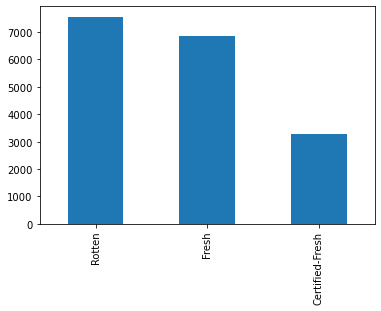

In [25]:
moviedf['tomatometer_status'].value_counts().plot(kind='bar')